# Welcome to Keeplerite

### A light way to keep all your Kepler stuff! 

This tutorial will show 
* How to import keeplerite in a jupyter notebook 
* How to make an `Astro_Objects` object 
* How to obtain TPFs, lightcurves, and periodograms of these objects. 

### 1. Importing

First of all, you need to let python know where to find the module. After downloading the package from my github, use the code block below to add it to your Path, this is where python checks for packages and modules. 

In [ ]:
import sys
from pathlib import Path

sys.path.append("/path/to/where/you/keep/keeplerite")

Now you're all ready to import keeplerite like a normal package. 

You'll need to import lightkurve as well. 

In [9]:
from keeplerite.astro_objects import Astro_Objects , TPF , LC , PD 

import lightkurve as lk 

%matplotlib inline

### 2. Making an Object

The search function in `lightkurve` takes a long time to run, therefore to be able to make the streamlit app faster, I took that out of the `Astro_Object` class. This means before you can make an object, first you need to search for the object using `lightkurve` and feed that into the class. 

`Astro_Objects` class takes this search, and the name of the target (for titling the plots) as parameters. Here's an example. 

In [5]:
name = "Kepler-8"
search = lk.search_targetpixelfile(name, mission = "Kepler", exptime = "long" )

object = Astro_Objects(search, target_name=name)

### 3. Getting plots 

After creating our object, now we can choose the quarter we want to display in the target pixel file. You can access the available quarters in an array as shown below. 

In [7]:
object.quarters

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

Now we can set the tpf with the quarter we want. After setting the tpf, now we can use the functions associated with this tpf, such as adjusting the aperture and plotting. 

Aperture can be entered as "pipeline", "threshold", "all", and "custom". A custom aperture will require a threshold value. We can also choose to show this selected aperture by setting `show_aperture` True. 

(<Figure size 848.5x400 with 2 Axes>,
 <Axes: title={'center': 'Target Pixel File of Kepler-8, Quarter 4'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>)

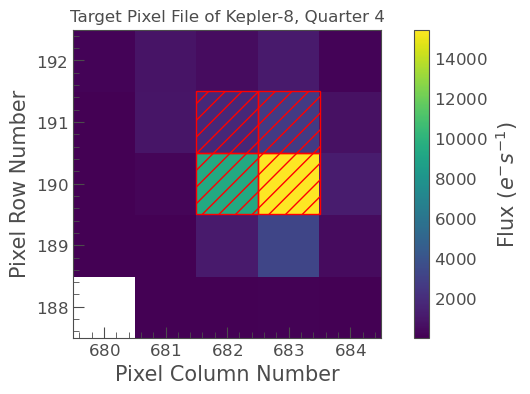

In [ ]:
object.set_tpf(quarter = 4)

object.tpf.set_aperture("custom", 3)
object.tpf.plot_tpf(show_aperture = True)

Similarly, now we can create a lightcurve from this target pixel file. After setting it up with the aperture wanted, now we can use the functions in object.lc, such as filtering the lightcurve from outlier values and plotting. 

(<Figure size 848.5x400 with 1 Axes>,
 <Axes: title={'center': 'Lightcurve of Kepler-8'}, xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>)

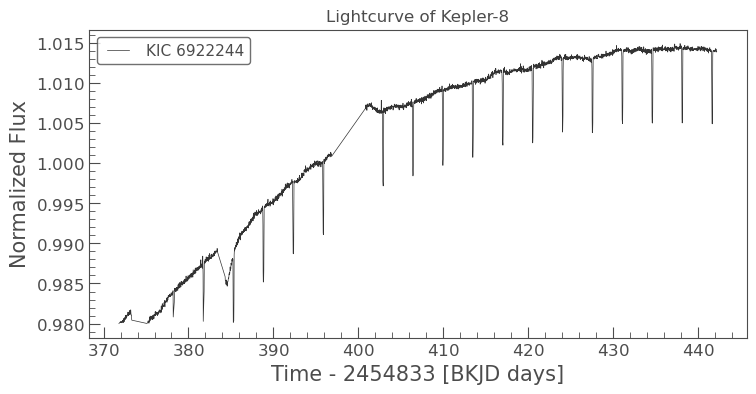

In [11]:
object.set_lc(stitch = False, 
              aperture_type = "custom",
              threshold = 3)

object.lc.filter_lcs(percentage = 2)
object.lc.plot_lc()

Laslty, we can analyze this lightcurve by turning it into a periodogram, where different frequencies are fit to the lightcurve. This plot allows us to identify several parameters of variable stars. 

To create a periodogram of an object, use the set_pd() method. There are three optional parameters, the minimum and maximum frequencies and the number of iterations for FAP calculation. After setting up the periodogram, you can plot with desired smoothing and scale. 

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Periodogram of Kepler-8'}, xlabel='Frequency [$\\mathrm{\\mu Hz}$]', ylabel='Power [$\\mathrm{\\frac{1}{\\mu Hz}}$]'>)

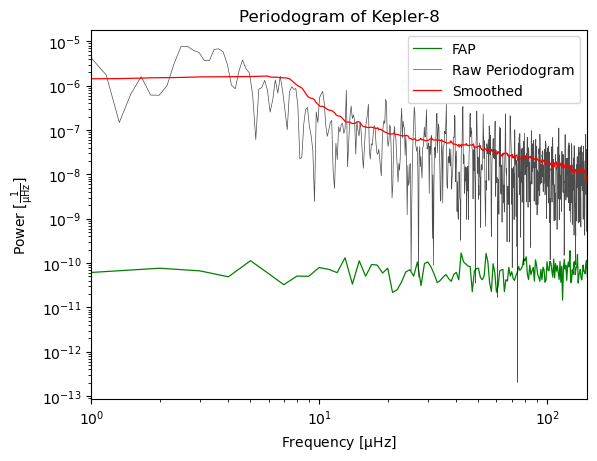

In [12]:
object.set_pd()
object.pd.plot_pd(scale = "log")

Don't forget to check out the streamlit app for a pretty user interface as well! 

[![Open in Streamlit](https://static.streamlit.io/badges/streamlit_badge_black_white.svg)](https://keeplerite.streamlit.app/)